<a href="https://colab.research.google.com/github/ThucNguyen22/Netflix-Movies-and-TV-Shows/blob/master/Netflix_Movies_and_TV_Shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# **Import Libraries and Data.**

In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po

from collections import Counter
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [33]:
# Importing nltk library
import nltk
nltk.download('stopwords')
import string

from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
!pip install yellowbrick

In [3]:
!pip install kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.8 MB/s eta 0:00:00


In [4]:
import os
if not os.path.exists("images"):
    os.mkdir("images")

In [5]:
# Mount Drive to load data.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Load the data.
df = pd.read_csv('/content/drive/MyDrive/database_netflix.csv')

# **Data overview.**

In [8]:
# Fisrt 5 values.
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [9]:
# Last 5 values.
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,20-Nov-19,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,1-Jul-19,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,1-Nov-19,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-Jan-20,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2-Mar-19,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [10]:
# Shape of the data.
df.shape

(8807, 12)

In [11]:
# Basic info about the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [12]:
# Check for null values.
for col in df.columns:
  null_rate = df[col].isnull().sum() / len(df) * 100
  if null_rate > 0:
    print(f'Percentage of null values in {col} : {null_rate}%')

Percentage of null values in director : 29.908027705234474%
Percentage of null values in cast : 9.367548540933349%
Percentage of null values in country : 9.435676166685592%
Percentage of null values in date_added : 0.11354604292040424%
Percentage of null values in rating : 0.07948223004428297%


In [13]:
# Check for duplicated entries.
df.duplicated().sum()

0

In [14]:
# Statistical info.
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8800,8807,8807,8807
unique,8807,2,8804,4528,7692,748,1767,NaN,14,220,514,8775
top,s1,Movie,15-Aug,Rajiv Chilaka,David Attenborough,United States,1-Jan-20,NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,2,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


***Points to be noted:*** 📝

* There are 7787 rows and 12 columns provided in the data.
* Null values are present in director, cast, country, date_added, and rating; Since there are only few null values present in date_added and rating (10 & 7 respectively) we will remove them from the data.
* No duplicate values exist.




***Lets clean the data before we go any further.***🧹

***First replace few null values.*** 🔁

In [15]:
# Number of null values in date_added.
df.date_added.isnull().sum()

10

In [16]:
# Remove null values in date_added.
df.dropna(subset=['date_added'], inplace=True)

In [17]:
# Number of null values in rating.
df.rating.isnull().sum()

7

In [18]:
# Remove null values in rating.
df.dropna(subset=['rating'], inplace=True)

In [19]:
# Check the shape of our data.
df.shape

(8790, 12)

***There go the null values...***💨

***As for the rest of the columns containing null values, we will handle them accordingly in future analyses.***

***Second, add few more datetime features.***📅⏲️

In [20]:
# Create new features to store date, day, month and year seperately.
df["date_added"] = pd.to_datetime(df['date_added'])  # First convert date_added to date time format.
df['day_added'] = df['date_added'].dt.day            # Compute day.
df['year_added'] = df['date_added'].dt.year          # Compute year.
df['month_added'] = df['date_added'].dt.month        # Compute month.

In [31]:
#create segment ratings
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Older Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Older Kids',
    'PG': 'Older Kids',
    'G': 'Older Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_ages'] = df['rating'].replace(ratings_ages)
df['target_ages'].unique()

array(['Teens', 'Adults', 'Older Kids'], dtype=object)

In [123]:
#single_genre vs multiple genre
df['genre'] = df['listed_in'].apply(lambda x: x.split(",")[0])

**inning of Rating attribute**
In rating columns we have different categories these are content rating classifications that are commonly used in the United States and other countries to indicate the appropriateness of media content for different age groups. Let's understand each of them and binnig them accordingly:

**TV-MA**: This rating is used for mature audiences only, and it may contain strong language, violence, nudity, and sexual content.

**R**: This rating is used for movies that are intended for audiences 17 and older. It may contain graphic violence, strong language, drug use, and sexual content.

**PG-13**: This rating is used for movies that may not be suitable for children under 13. It may contain violence, mild to moderate language, and suggestive content.

**TV-14**: This rating is used for TV shows that may not be suitable for children under 14. It may contain violence, strong language, sexual situations, and suggestive dialogue.

**TV-PG**: This rating is used for TV shows that may not be suitable for children under 8. It may contain mild violence, language, and suggestive content.

**NR**: This stands for "Not Rated." It means that the content has not been rated by a rating board, and it may contain material that is not suitable for all audiences.

**TV-G**: This rating is used for TV shows that are suitable for all ages. It may contain some mild violence, language, and suggestive content.

**TV-Y**: This rating is used for children's TV shows that are suitable for all ages. It is intended to be appropriate for preschool children.

T**V-Y7**: This rating is used for children's TV shows that may not be suitable for children under 7. It may contain mild violence and scary content.

**PG**: This rating is used for movies that may not be suitable for children under 10. It may contain mild language, some violence, and some suggestive content.

**G**: This rating is used for movies that are suitable for general audiences. It may contain some mild language and some violence.

**NC-17**: This rating is used for movies that are intended for adults only. It may contain explicit sexual content, violence, and language.

**TV-Y7-FV**: This rating is used for children's TV shows that may not be suitable for children under 7. It may contain fantasy violence.

**UR**: This stands for "Unrated." It means that the content has not been rated by a rating board, and it may contain material that is not suitable for all audiences.

In [88]:
#Concise Summary
for c in ['type','date_added','release_year','duration']:
    print('*',)
    print(df[c].describe())

*
count      8790
unique        2
top       Movie
freq       6126
Name: type, dtype: object
*
count                    8790
unique                   1713
top       2020-01-01 00:00:00
freq                      110
first     2008-01-01 00:00:00
last      2021-09-25 00:00:00
Name: date_added, dtype: object
*
count    8790.000000
mean     2014.183163
std         8.825466
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64
*
count         8790
unique         220
top       1 Season
freq          1791
Name: duration, dtype: object


***Now lets start with EDA.***

# **Exploratory Data Analysis:** 📊

## **Type:**

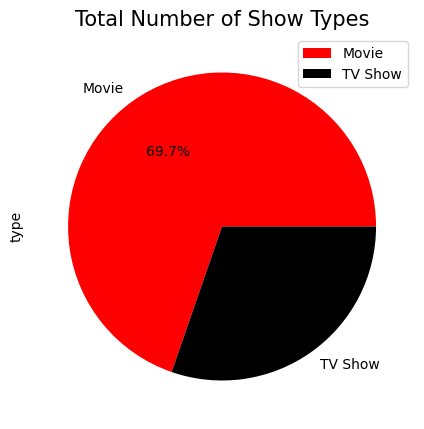

In [22]:
# Assuming 'df' is your DataFrame and 'type' is a column in it
# Count the number of occurrences of each show type
shows = df['type'].value_counts()

# Specify colors for the pie chart slices
colors = ['red','black']

# Create a pie chart of the show types
shows.plot.pie(figsize=(5, 5), autopct='%1.1f%%', fontsize=10, colors=colors)

# Add a title and legend to the chart
plt.title('Total Number of Show Types', fontsize=15, fontfamily='sans-serif')
plt.legend(loc='upper right')

# Display the plot
plt.show()


***The pie chart visualization shows that approximately 70% of the content on Netflix consists of film, while the remaining 30% are TV shows. Next, to identify the top 10 countries where Netflix is popular, we can use the following code:.***

In [23]:
#new df content by type
df_movies = df.loc[df["type"]=="Movie"]
df_tv_shows = df.loc[df["type"]=="TV Show"]

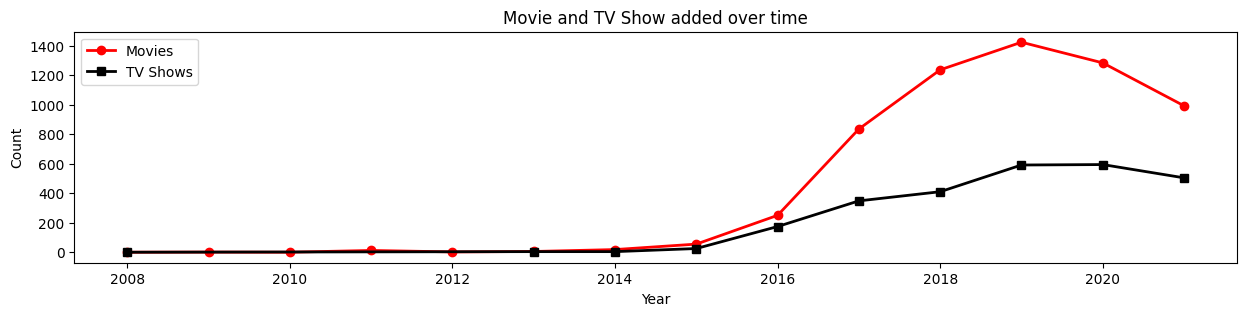

In [24]:
movies_count = df_movies['year_added'].value_counts().sort_index()
tv_shows_count = df_tv_shows['year_added'].value_counts().sort_index()

# Create a line chart to visualize the trends over time
plt.figure(figsize=(15, 3))
plt.plot(movies_count.index, movies_count.values, color='red',
label='Movies',linewidth=2, marker='o')
plt.plot(tv_shows_count.index, tv_shows_count.values, color='k',
label='TV Shows', linewidth=2, marker='s')



# Customize the plot
plt.title('Movie and TV Show added over time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()


# Show the plot
plt.show()

* ***The line chart illustrates the number of movies and TV shows added to Netflix over time. It visually represents the growth and trends in content additions, with separate lines for films and TV shows.
.
.***
* ***Also, it is interesting that the content addition dropped in 2020. This could be due to the pandemic situation.
.***
* ***Next, we explore the distribution of content additions across different months. This analysis helps us identify patterns and understand when Netflix introduces new content..***
* ***The line plot shows very few movies, and tv shows got added in 2021. It is due to very little data collected from the year 2021.***

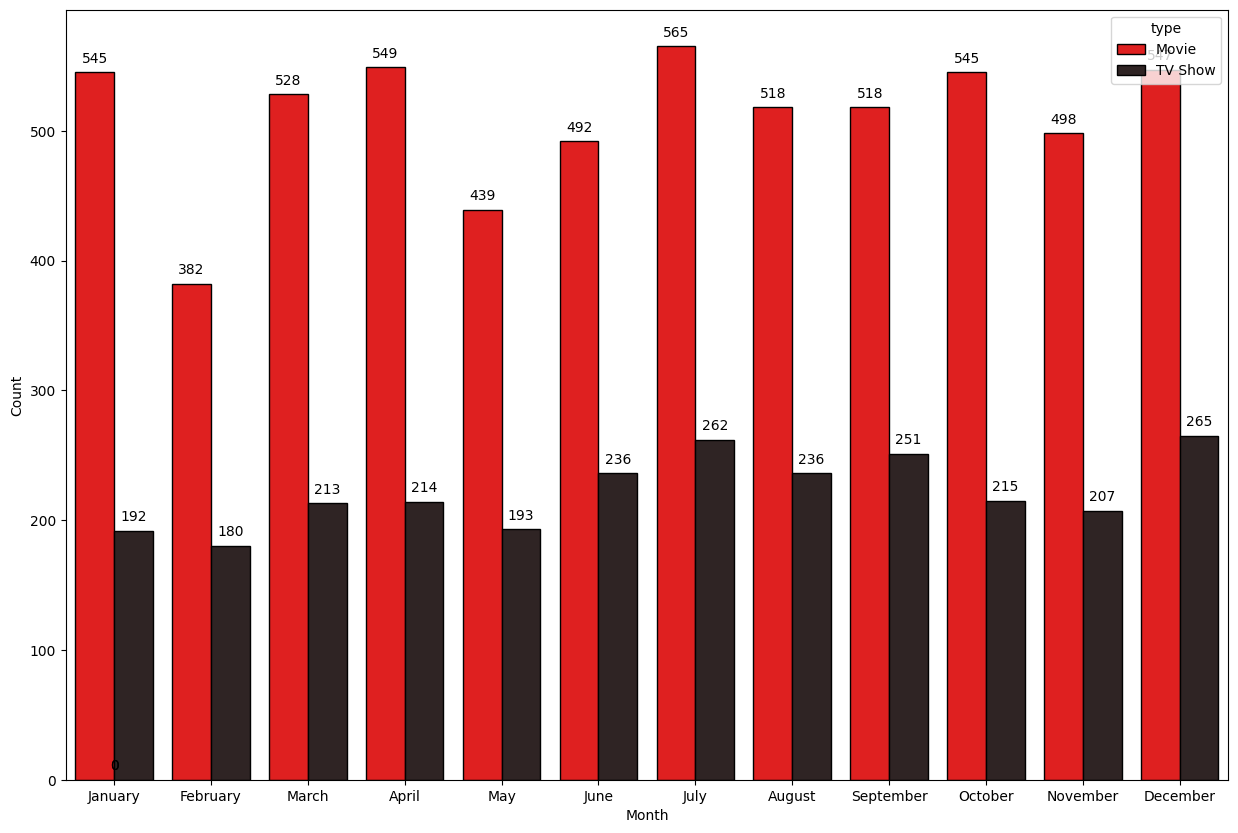

In [25]:
df['month_added'] = pd.to_datetime(df['date_added']).dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
monthly_counts = df.groupby(['month_added', 'type']).size().reset_index().rename(columns={0: 'num'})# order X
df['month_added'].value_counts().loc[month_order]
max_month_count = monthly_counts.max()





plt.figure(figsize=(15, 10))
ax = sns.barplot(data = monthly_counts,x='month_added', y='num',palette="dark:red_r", order = month_order,edgecolor='black',hue='type')
#plt.title('Most content added per month')
plt.xlabel('Month')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.show()

In [27]:
#create columns day of week
df['date_of_week'] = df['date_added'].dt.day_name()
df['date_of_week']

0        Saturday
1          Friday
2          Friday
3          Friday
4          Friday
          ...    
8802    Wednesday
8803       Monday
8804       Friday
8805     Saturday
8806     Saturday
Name: date_of_week, Length: 8790, dtype: object

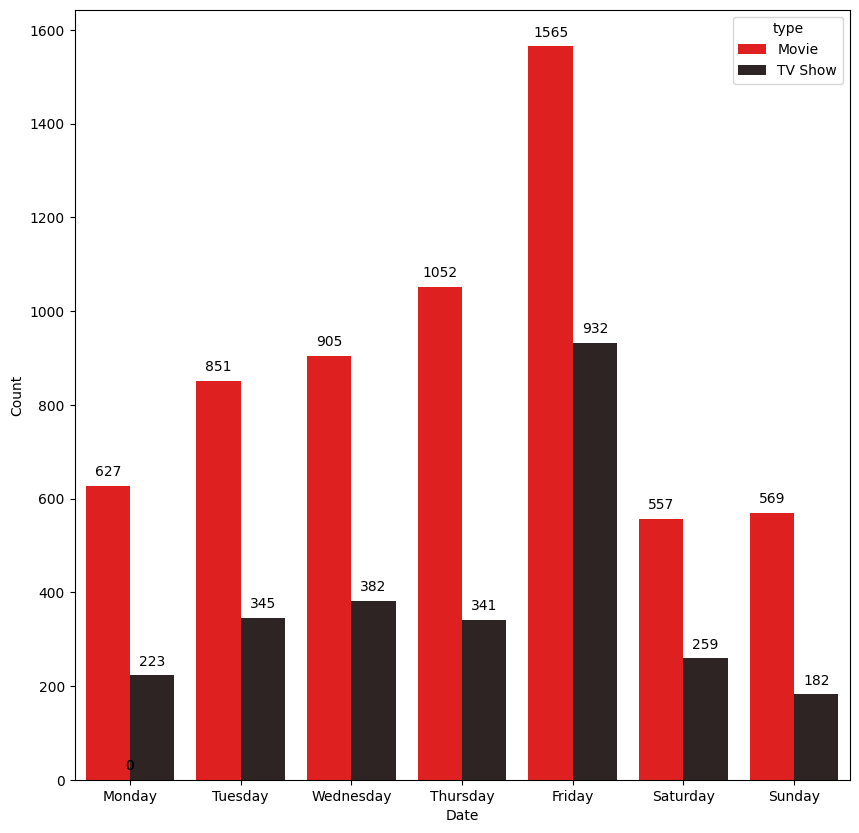

In [28]:
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

daily_counts = df.groupby(['date_of_week', 'type']).size().reset_index().rename(columns={0: 'num'}) # order X
df['date_of_week'].value_counts().loc[day_order]

# Determine the maximum count
max_day_count = daily_counts.max()


plt.figure(figsize=(10, 10))
ax = sns.barplot(data=daily_counts, x='date_of_week', y='num', palette="dark:red_r",order = day_order, hue='type')
#plt.title('Most content added per date')
plt.xlabel('Date')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

* ***The most movie additions on Netflix are July and April -  This information can be valuable for viewers who want to anticipate new releases during these months..***
* ***December and January, around Christmas and New Year, also see a significant number of additions, likely due to the festive season, making it a good time for movie releases on Netflix.***
* ***Friday is the best day, followed by Thursday.***

## **Release_year**

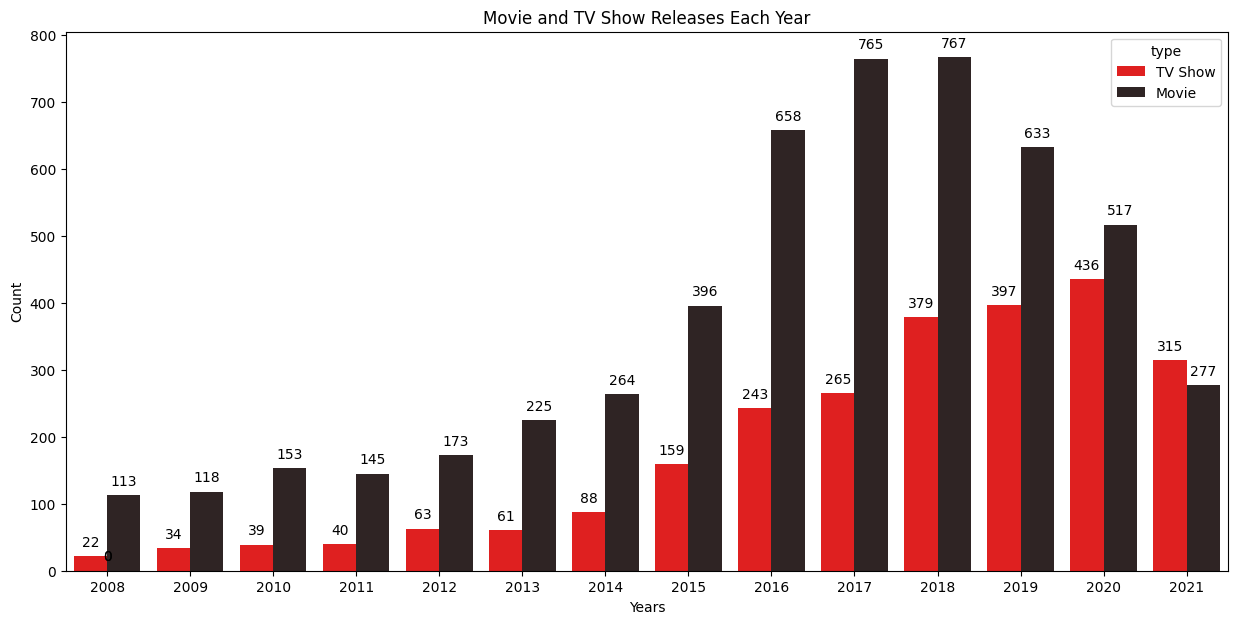

In [29]:
order = range(2008, 2022)

plt.figure(figsize=(15, 7))

ax = sns.countplot(x='release_year', data=df, hue='type', order=order, palette="dark:red_r")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Movie and TV Show Releases Each Year')
plt.xlabel('Years')
plt.ylabel('Count')

plt.show()


* ***82% of the content available was released between 2010 and 2021.***
* ***17.28% of the content available was released before 2010.***

## Duration

In [36]:
temp_duration = df_movies['duration'].apply(lambda x: int(x.split(' ')[0]) if ('min' in str(x)) else x)
temp_duration

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 6126, dtype: int64

In [37]:
# Split into 30min step, upto 3 hours, 3h+
df_movies.loc[temp_duration.loc[temp_duration < 30].index, 'duration_bin'] = 'Less than 30 min'
df_movies.loc[temp_duration.loc[(temp_duration >= 30)&(temp_duration <60 )].index, 'duration_bin'] = 'More than 30 min - 1 hours'
df_movies.loc[temp_duration.loc[(temp_duration >=60)&(temp_duration<90)].index, 'duration_bin'] = 'More than 1 hours - 1.30 hours'
df_movies.loc[temp_duration.loc[(temp_duration >=90)& (temp_duration < 120)].index,'duration_bin'] = 'More than 1.30 - 2 hours'
df_movies.loc[temp_duration.loc[(temp_duration >=120)&(temp_duration <150)].index, 'duration_bin'] = '2 - 2.30 hours'
df_movies.loc[temp_duration.loc[temp_duration >= 150].index, 'duration_bin'] = 'More than 2.30 hours'

In [38]:
duration_movies_counts = df_movies['duration_bin'].value_counts(ascending=False)
max_duration = duration_movies_counts.max()

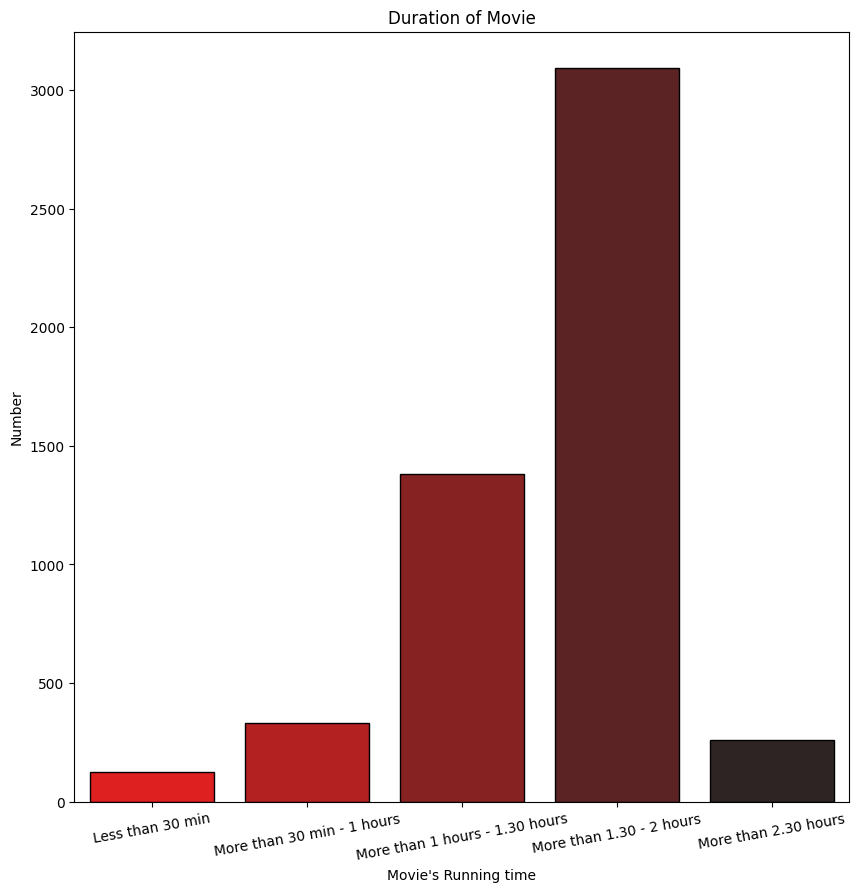

In [39]:
plt.figure(figsize=(10,10))
sns.countplot(data = df_movies,x='duration_bin',
                                          order = ['Less than 30 min','More than 30 min - 1 hours','More than 1 hours - 1.30 hours','More than 1.30 - 2 hours','More than 2.30 hours'],
                                          palette="dark:red_r",edgecolor='black')
plt.xlabel("Movie's Running time")
plt.ylabel("Number")
plt.xticks(rotation = 10)
plt.title('Duration of Movie')

#for index, value in enumerate(duration_movies_counts.values):
#    countplot_movies_duration.text(index, value, str(value), ha='center', va='bottom')
plt.show()

In [40]:
temp_duration_tvshow = df_tv_shows['duration'].apply(lambda x: int(x.split(' ')[0]) if ('Season' in str(x)) else x)


In [41]:
df_tv_shows.loc[temp_duration_tvshow.loc[temp_duration_tvshow == 1].index, 'duration_bin'] = '1 Season'
df_tv_shows.loc[temp_duration_tvshow.loc[temp_duration_tvshow == 2].index, 'duration_bin'] = '2 Seasons'
df_tv_shows.loc[temp_duration_tvshow.loc[temp_duration_tvshow == 3].index, 'duration_bin'] = '3 Seasons'
df_tv_shows.loc[temp_duration_tvshow.loc[temp_duration_tvshow == 4].index, 'duration_bin'] = '4 Seasons'
df_tv_shows.loc[temp_duration_tvshow.loc[temp_duration_tvshow == 5].index, 'duration_bin'] = '5 Seasons'
df_tv_shows.loc[temp_duration_tvshow.loc[temp_duration_tvshow == 6].index, 'duration_bin'] = '6 Seasons'
df_tv_shows.loc[temp_duration_tvshow.loc[temp_duration_tvshow == 7].index, 'duration_bin'] = '7 Seasons'
df_tv_shows.loc[temp_duration_tvshow.loc[temp_duration_tvshow == 8].index, 'duration_bin'] = '8 Seasons'
df_tv_shows.loc[temp_duration_tvshow.loc[temp_duration_tvshow >= 9].index, 'duration_bin'] = '9 Seasons +'

In [42]:
# Suggest preprocessing here to extract number of seasons + combine >9 seasons
duration_tvshows_counts = df_tv_shows['duration_bin'].value_counts()
max_duration_tv = duration_tvshows_counts.max()

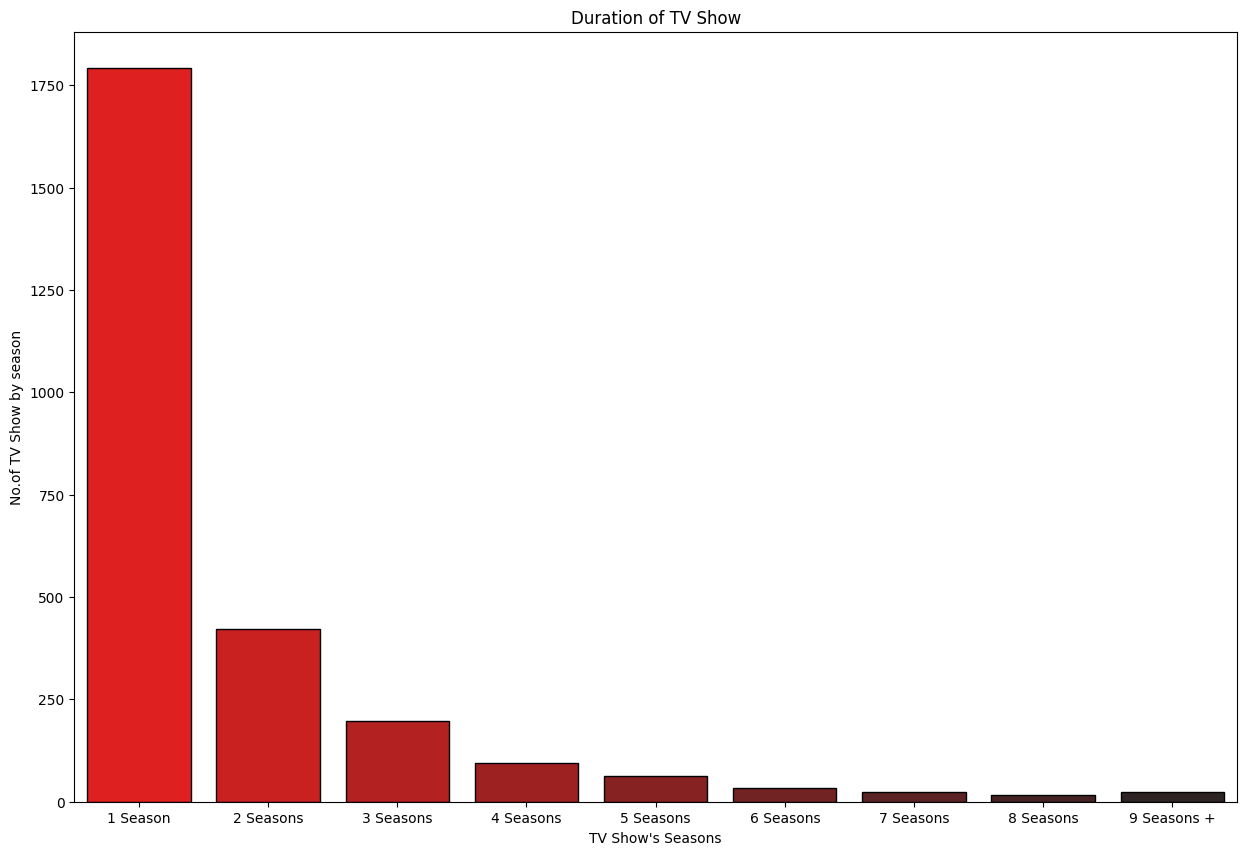

In [43]:
plt.figure(figsize=(15,10))
countplot_tvshows_duration=sns.countplot(data = df_tv_shows,
                                         x='duration_bin',
                                         order = ['1 Season','2 Seasons','3 Seasons','4 Seasons','5 Seasons','6 Seasons','7 Seasons','8 Seasons','9 Seasons +'],
                                         palette="dark:red_r",
                                         edgecolor='black')
plt.title('Duration of TV Show')
plt.xlabel("TV Show's Seasons")
plt.ylabel("No.of TV Show by season")
#plt.xticks(rotation=20)
#for index, value in enumerate(duration_tvshows_counts.values):
#    countplot_tvshows_duration.text(index, value, str(value), ha='center', va='bottom')

plt.show()

* ***Most of the TV Shows last for 1 or 2 seasons.
For TV shows, finding those with more than 3-4 seasons is uncommon.***
* ***Consistent trend of movie durations, of which duration time is around in between 90-150 minutes.***

## **Title**

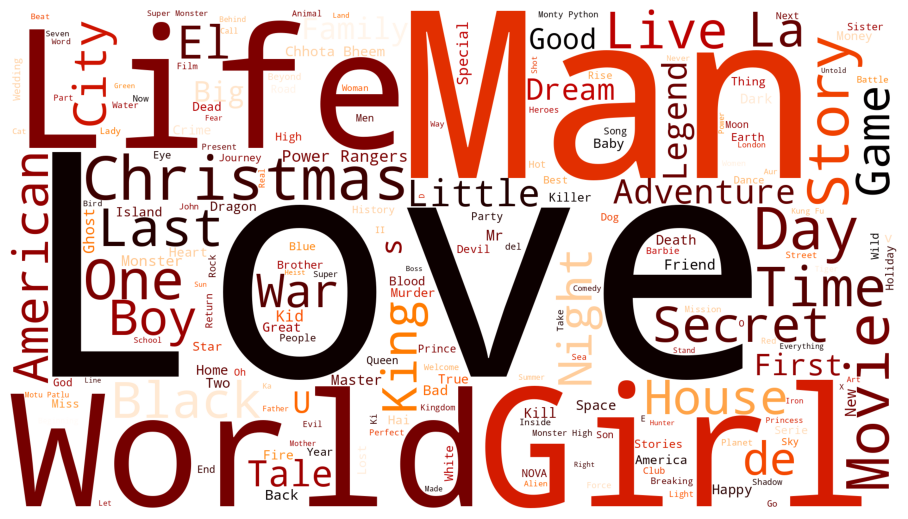

In [34]:
stopwords = set(STOPWORDS)


plt.subplots(figsize=(20,5))
wordcloud = WordCloud(
                          background_color='white',
                          stopwords = stopwords,
                          width=1920,
                          height=1080,
                          colormap = 'gist_heat'
                         ).generate(" ".join(df.title))

plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()



* ***Most repeated words in title include Christmas, Love, World, Man, and Story.***
* ***We saw that most of the movies and tv shows got added during the winters, which tells why Christmas appeared many times in the titles.***

## **Description**

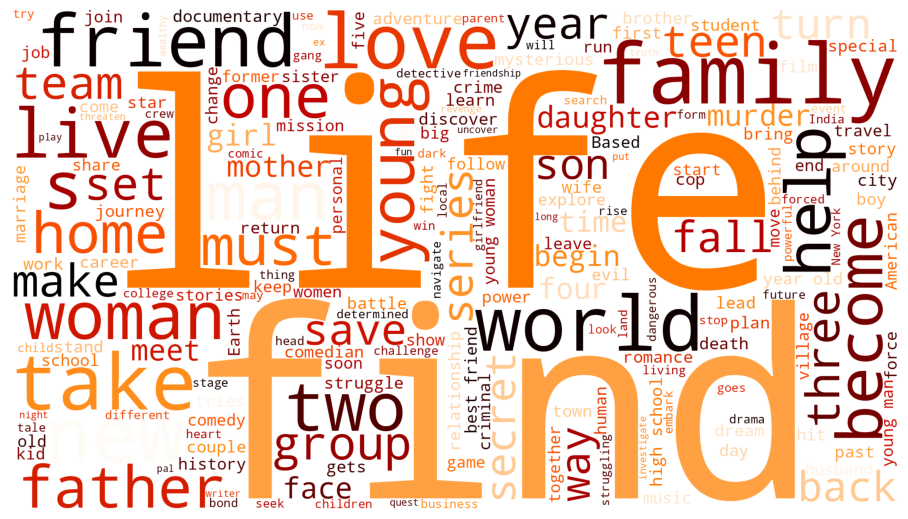

In [35]:
stopwords = set(STOPWORDS)


plt.subplots(figsize=(20,5))
wordcloud = WordCloud(
                          background_color='white',
                          stopwords = stopwords,
                          width=1920,
                          height=1080,
                          colormap = 'gist_heat'
                         ).generate(" ".join(df.description))

plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.tight_layout(pad = 0)

plt.show()

* ***Most occurring words in the description of the tv shows and movies are Family, Friend, Love, Life, Woman, Man.***

## **Content vs Country:**

In [50]:
#Handle missing value
country_null_values = df.country.isnull().sum()

df['country'].fillna('United States', inplace=True)
df['country_single'] = df['country'].apply(lambda x: x.split(",")[0])

In [51]:
country_null_values = df.country.isnull().sum()
print(f'We had observed that variable country had {country_null_values} null values in it, we will replace these null values with the most occurring country which is United States.')

We had observed that variable country had 0 null values in it, we will replace these null values with the most occurring country which is United States.


In [52]:
country_order = df['country_single'].value_counts()[:10].index
countryVScontent = df[['type', 'country_single']].groupby('country_single')['type'].value_counts().unstack().loc[country_order].reset_index()
countryVScontent

type,index,Movie,TV Show
0,United States,2800.0,1231.0
1,India,927.0,81.0
2,United Kingdom,382.0,245.0
3,Canada,187.0,84.0
4,Japan,85.0,172.0
5,France,148.0,64.0
6,South Korea,47.0,164.0
7,Spain,129.0,52.0
8,Mexico,86.0,48.0
9,Australia,61.0,54.0


In [53]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=countryVScontent['index'],
    y=countryVScontent['Movie'],
    name='Movie',

    marker=dict(
        color='rgba(238, 25, 18, 1)'
    )
))

fig.add_trace(go.Bar(
    x=countryVScontent['index'],
    y=countryVScontent['TV Show'],
    name='TV Show',

    marker=dict(
        color='rgba(40, 34, 34, 1)'
    )
))


fig.update_layout(
    title={
        'text': 'Top 5 countries provide content on Netflix',
        'y': 0.9,
        'x': 0.5,
        'font_size': 25,

        'xanchor': 'center',
        'yanchor': 'top'
    },
    barmode='group',
    height=650,
    width=1550,
    plot_bgcolor='white',  # Set background color of the plot
    paper_bgcolor='white'  # Set background color of the paper (area outside the plot)
)

fig.show()


* ***The United States is a leading producer of both types of content; this makes sense since Netflix is a US company.***

* ***The influence of Bollywood in India explains the type of content available, and perhaps the main focus of this industry is Movies and not TV Shows.***

* ***On the other hand, TV Shows are more frequent in South Korea, which explains the KDrama culture nowadays.***


**Now lets find which Genre is more popular in these countries.**

In [54]:
country_order = df['country_single'].value_counts()[:10].index
countryVStarget_ages = df[['target_ages', 'country_single']].groupby('country_single')['target_ages'].value_counts().unstack().loc[country_order].reset_index()
countryVStarget_ages

target_ages,index,Adults,Older Kids,Teens
0,United States,1845.0,1149.0,1037.0
1,India,266.0,174.0,568.0
2,United Kingdom,328.0,162.0,137.0
3,Canada,129.0,97.0,45.0
4,Japan,91.0,69.0,97.0
5,France,132.0,40.0,40.0
6,South Korea,93.0,34.0,84.0
7,Spain,148.0,14.0,19.0
8,Mexico,103.0,15.0,16.0
9,Australia,53.0,44.0,18.0


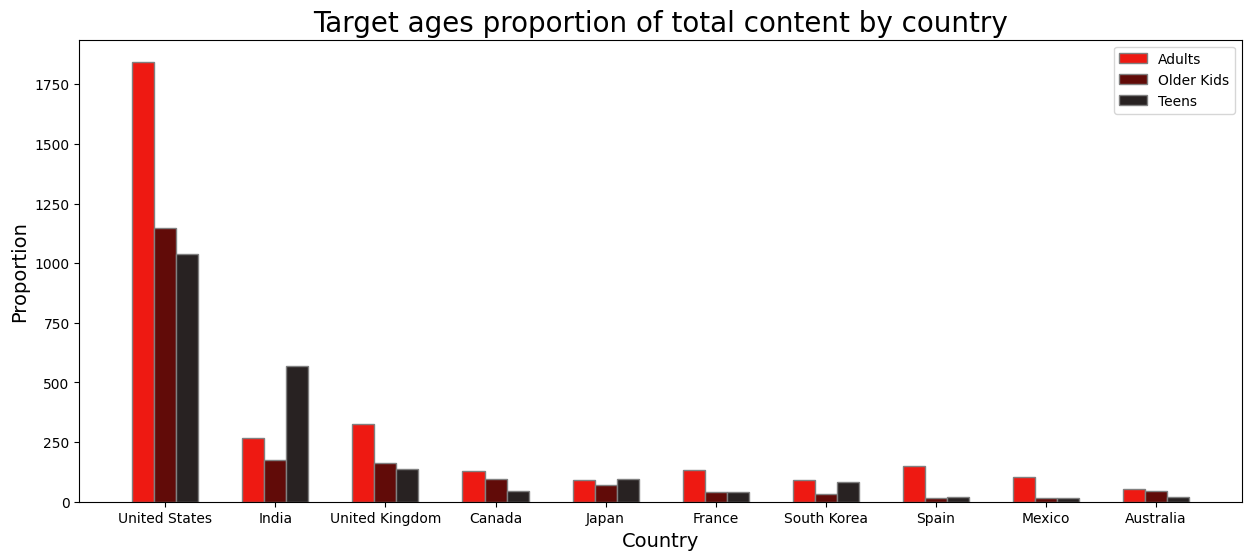

In [58]:
from matplotlib.colors import to_rgba

# Define colors for each category
colors = [
    to_rgba((238/255, 25/255, 18/255, 1)),
    to_rgba((97/255, 11/255, 8/255, 1)),
    to_rgba((40/255, 34/255, 34/255, 1))
]

# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Set the width of the bars
bar_width = 0.2

# Set positions for each group of bars
r1 = np.arange(len(countryVStarget_ages['index']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plot bars for each category
ax.bar(r1, countryVStarget_ages['Adults'], color=colors[0], width=bar_width, edgecolor='grey', label='Adults')
ax.bar(r2, countryVStarget_ages['Older Kids'], color=colors[1], width=bar_width, edgecolor='grey', label='Older Kids')
ax.bar(r3, countryVStarget_ages['Teens'], color=colors[2], width=bar_width, edgecolor='grey', label='Teens')

# Set x-axis labels and tick locations
ax.set_xticks([r + bar_width for r in range(len(countryVStarget_ages['index']))])
ax.set_xticklabels(countryVStarget_ages['index'])

# Set plot title and labels
plt.title('Target ages proportion of total content by country', fontsize=20)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Proportion', fontsize=14)

# Add legend
plt.legend()

# Show the plot
plt.show()


* ***Drama, International Movies, and Comedies seem popular choices in most countries.***
* ***British and International Tv Shows dominate in the United Kingdom.***
* ***Regional specialties such as Anime in Japan and Korean Tv shows in South Korea are more prominent in these countries; This makes sense as anime has always been popular in Japan, and the rising k-pop culture explains the increase in Korean Tv Shows.***
* ***It's also observed that in the countries where the regional language is not English, International Tv Shows and Movies are more in demand.***

## **Year_added Vs Type**

**Hypothesis Testing to check is there is any relation between year_added and type:**

* ***Null Hypothesis:*** *year_added has no impact on type of content that gets added to the platform.*
* ***Alternative Hypothesis:*** *year_added has impact on type of content that gets added to the platform.*

***Set significance level to 0.05.***

In [59]:
# Create subset of data with required columns.
recent_years = pd.DataFrame(df.groupby(['year_added', 'listed_in'])['listed_in'].count())
recent_years.rename(columns={'listed_in':'Count'}, inplace=True)
recent_years = recent_years.reset_index()
recent_years.drop(recent_years[recent_years.year_added < 2018].index, inplace=True)

def seperate_all_genre(year):
  year_added = recent_years[recent_years['year_added'] == year]
  year_added = ", ".join(year_added['listed_in'].dropna()).split(", ")
  year_added_dict = dict(Counter(year_added))
  return year_added_dict
# Create a list of years.
year_list = [2018,2019,2020,2021]
# Iterate through all values in yr_list.
year_genre_count_list = {}
for i in year_list:
  data = seperate_all_genre(i)
  year_genre_count_list[i] = data
  year_genre_count_df = pd.DataFrame(year_genre_count_list).reset_index()
  year_genre_count_df.rename({'index':'Genre'}, inplace=True, axis=1)

In [60]:
df_1 = year_genre_count_df.sort_values([2018, 2019, 2020, 2021], ascending=False)

fig = go.Figure()

fig.add_trace(go.Scatter(
    y=df_1[2018],
    x=df_1['Genre'],
    mode='lines+markers',
    name='2018'
))

fig.add_trace(go.Scatter(
    y=df_1[2019],
    x=df_1['Genre'],
    mode='lines+markers',
    name='2019'
))

fig.add_trace(go.Scatter(
    y=df_1[2020],
    x=df_1['Genre'],
    mode='lines+markers',
    name='2020'
))

fig.add_trace(go.Scatter(
    y=df_1[2021],
    x=df_1['Genre'],
    mode='lines+markers',
    name='2021'
))

# Updating layout
fig.update_xaxes(tickangle=45)
fig.update_layout(

    barmode='group',  # 'group' for grouped bars, 'overlay' for overlaid bars
    height=650,
    width=1550,
    legend=dict(x=0.38, y=1.1, orientation="h")
)

# Show the figure
fig.show()


* ***The first thing that comes to my mind when I hear Netflix is Tv Shows,  and to be honest, I rarely watch any movies on the platform.***

* ***From the EDA we did in the beginning, we saw that there are more Movies than Tv Shows on Netflix, which might be enough to assume that Netflix focuses more on Movies than Tv Shows. But the data proves this assumption wrong.***

* ***The above line plot shows that Netflix has been adding many International Tv Shows, Tv Dramas, Tv Comedy Shows and many more tv shows in the recent years compared to Movies.***

* ***From this observation, we can say that Netflix might be shifting slowly towards Tv Shows.***

## **Rating**

*Each TV show and movie on Netflix is assigned a maturity rating to help members make informed choices for themselves and their children.Netflix determines maturity ratings by the frequency and impact of mature content in a TV show or movie. TV show ratings reflect the overall maturity level of the whole series.*


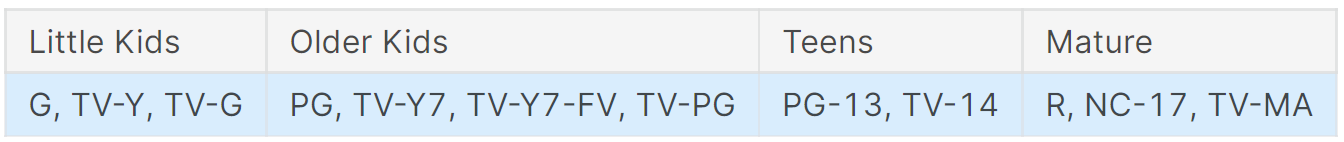




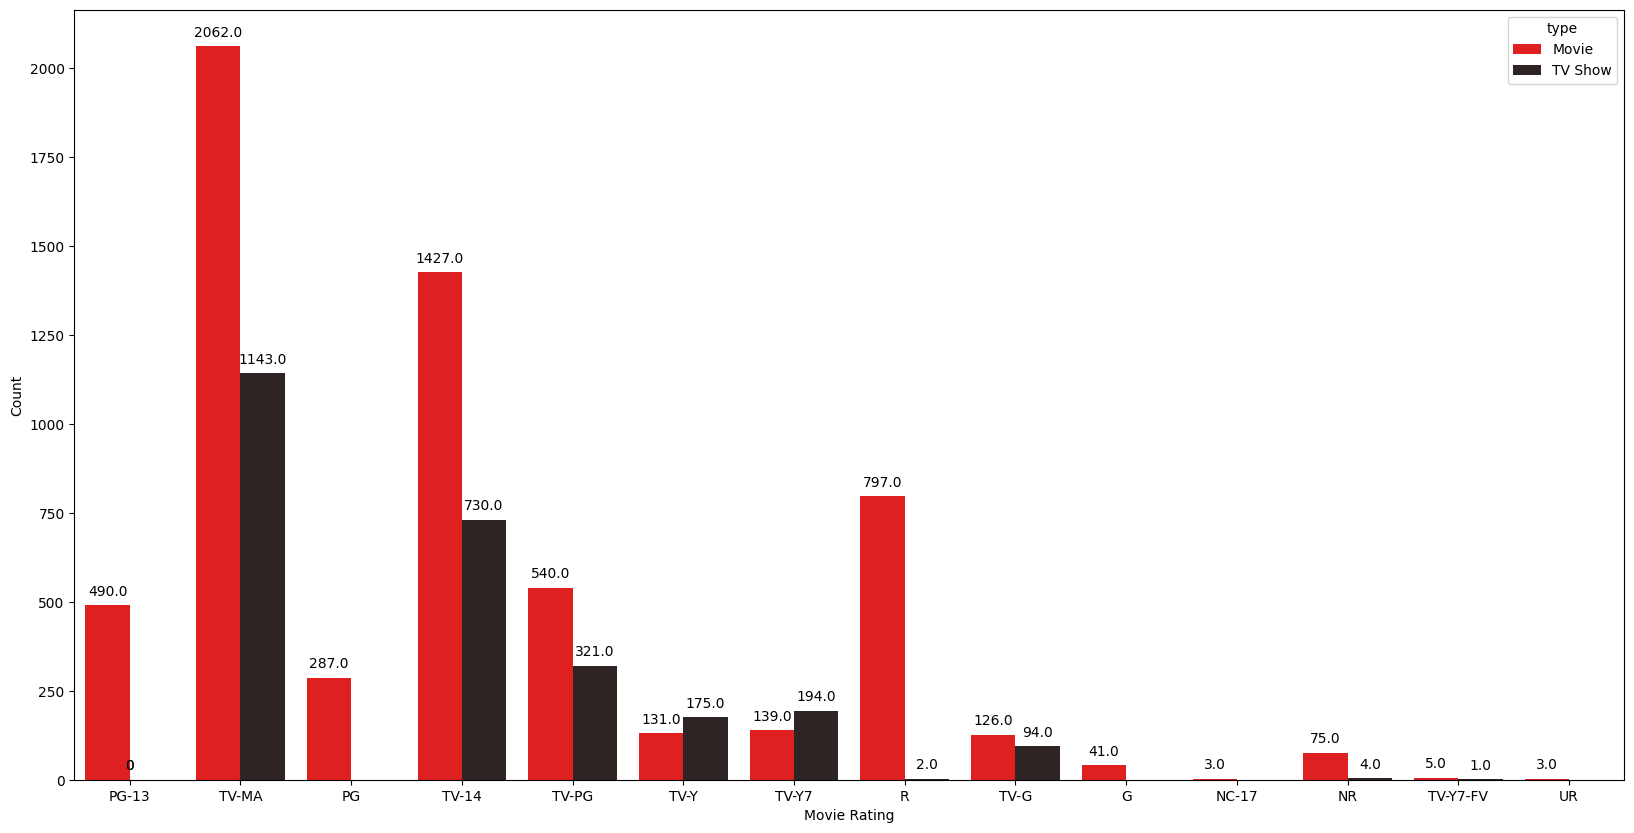

In [30]:
# Assuming df is your DataFrame and 'rating' is a categorical column
rating_counts = df['rating'].value_counts()

plt.figure(figsize=(20, 10))
ax = sns.countplot(data=df, x='rating', palette="dark:red_r", hue='type')

plt.xlabel('Movie Rating')
plt.ylabel('Count')

# Add count numbers above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


* ***TV-MA tops the charts, indicating that mature content is more popular on Netflix.***
* ***This popularity is followed by TV-14 and TV-PG, which are Shows focused on Teens and Older kids.***
* ***Very few titles with a rating NC-17 exist. It can be understood since this type of content is purely for the audience above 17.***

## Genre Correlation heatmap

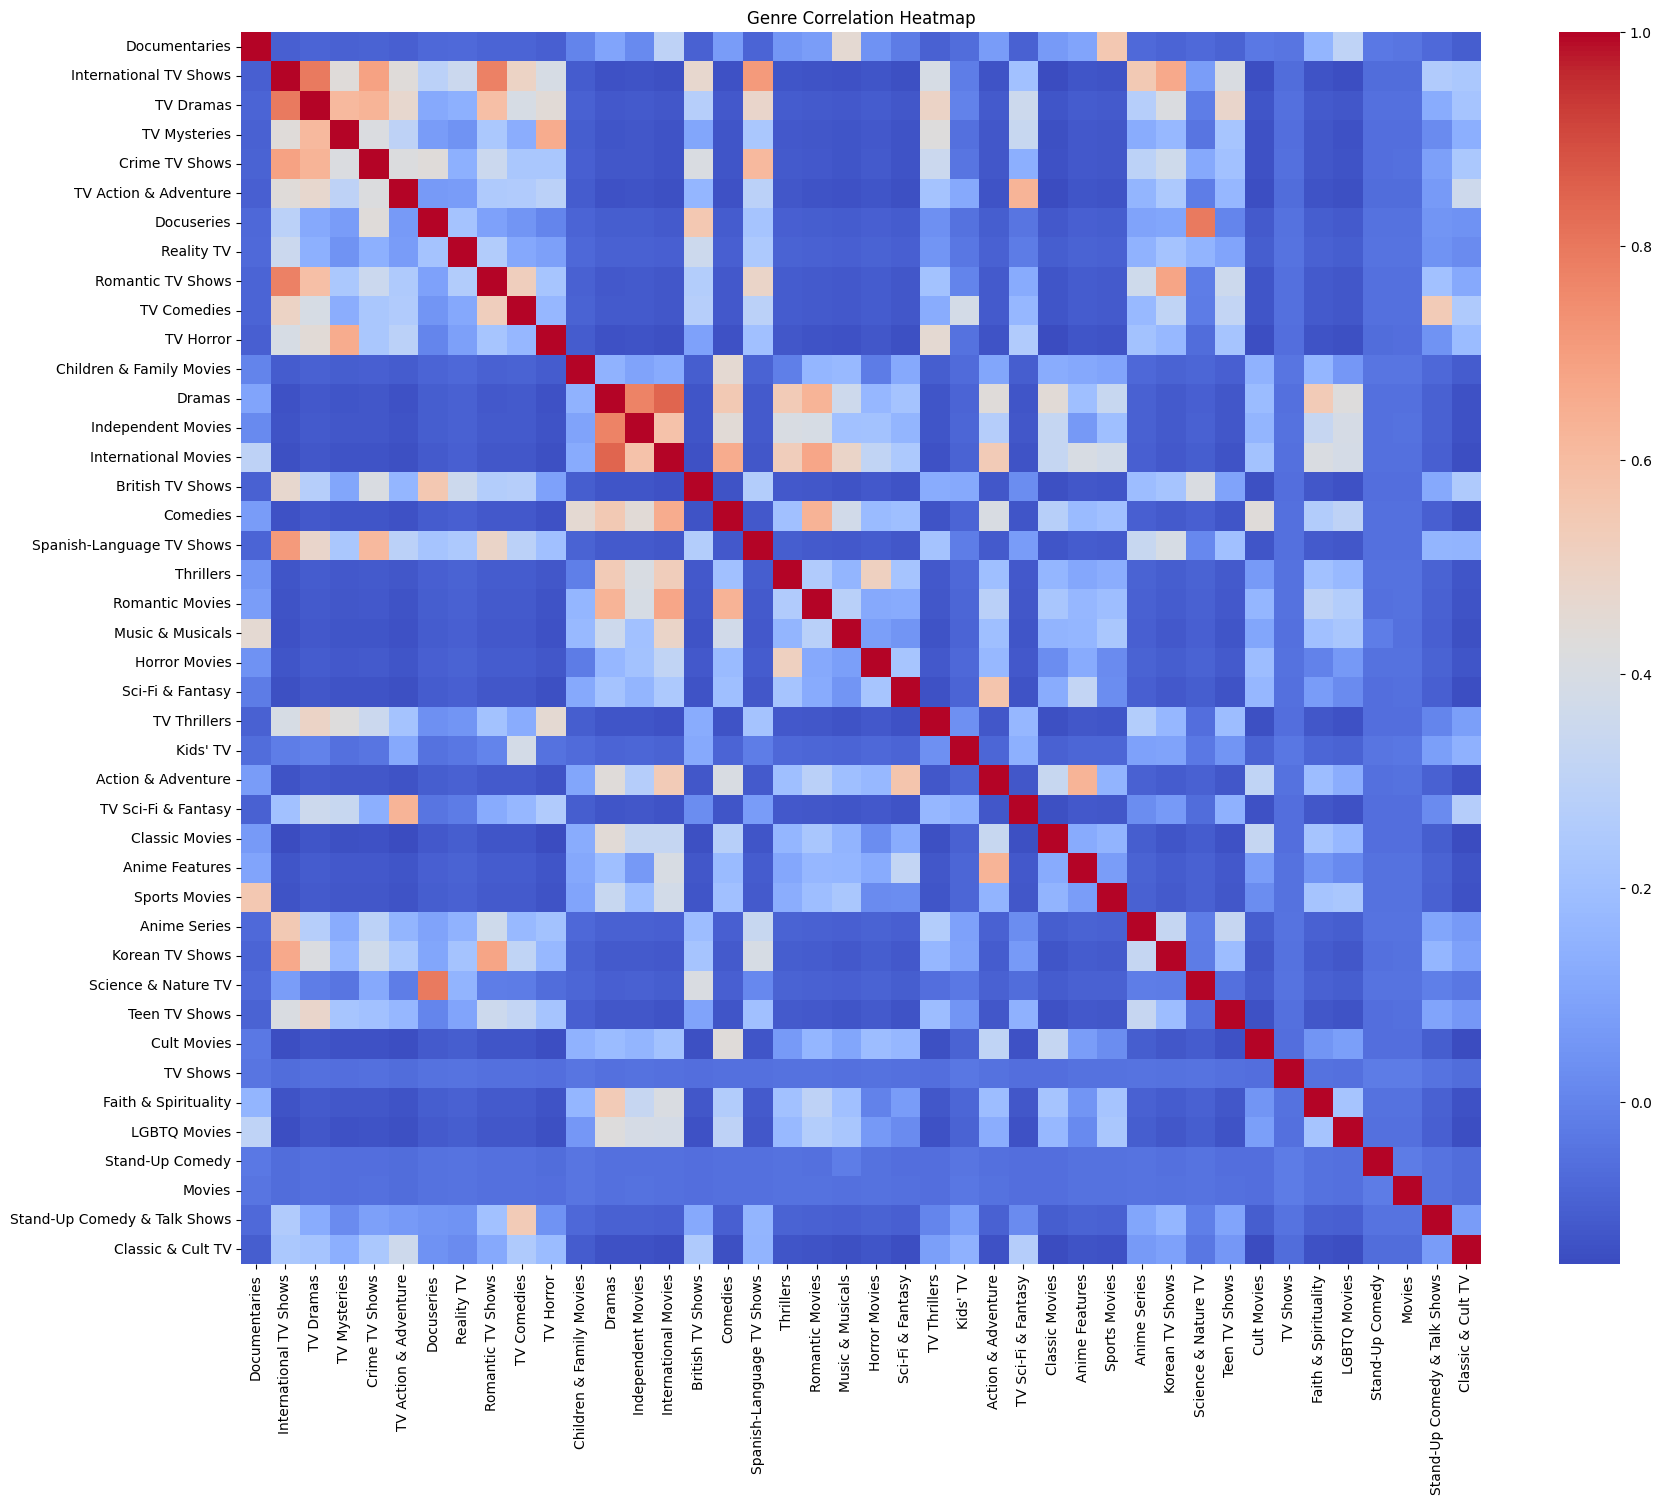

In [61]:
# Extracting unique genres from the 'listed_in' column
genres = df['listed_in'].str.split(', ', expand=True).stack().unique()

# Create a new DataFrame to store the genre data
genre_data = pd.DataFrame(index=genres, columns=genres, dtype=float)

# Fill the genre data DataFrame with zeros
genre_data.fillna(0, inplace=True)

# Iterate over each row in the original DataFrame and update the genre data DataFrame
for _, row in df.iterrows():
    listed_in = row['listed_in'].split(', ')
    for genre1 in listed_in:
        for genre2 in listed_in:
            genre_data.at[genre1, genre2] += 1

# Create a correlation matrix using the genre data
correlation_matrix = genre_data.corr()

# Create the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')

# Customize the plot
plt.title('Genre Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Show the plot
plt.show()

* ***The heatmap demonstrates the correlation between different genres.***

* ***By analyzing the heatmap, we can identify strong positive correlations between specific genres, such as TV Dramas and International TV Shows, Romantic TV Shows, and International TV Shows.***

## Content structure by genre

In [124]:
#single_genre vs multiple genre
df['genre'] = df['listed_in'].apply(lambda x: x.split(",")[0])

In [125]:
# Use .loc to explicitly set the values in the original DataFrame
df_movies.loc[:, 'genre'] = df_movies['listed_in'].apply(lambda x: x.split(",")[0])
df_tv_shows.loc[:, 'genre'] = df_tv_shows['listed_in'].apply(lambda x: x.split(",")[0])

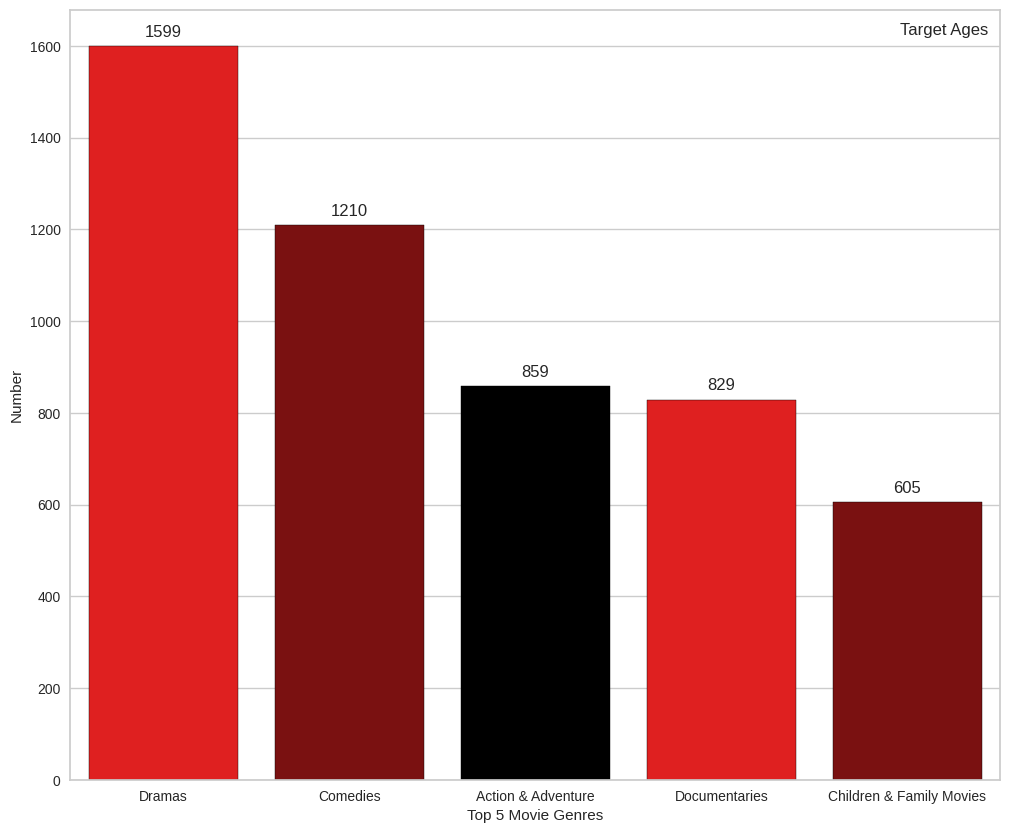

In [126]:
plt.figure(figsize=(12, 10))

# Create the count plot
ax = sns.countplot(x='genre', data=df_movies, order=df_movies["genre"].value_counts().index[0:5],
                   palette=['red', 'darkred', 'black'], edgecolor='black')

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(),ha='center')

# Add count numbers above the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Top 5 Movie Genres')
plt.ylabel('Number')
#plt.title('Distribution of Top 5 Movie Genres by Target Ages')
plt.legend(title='Target Ages')

plt.show()


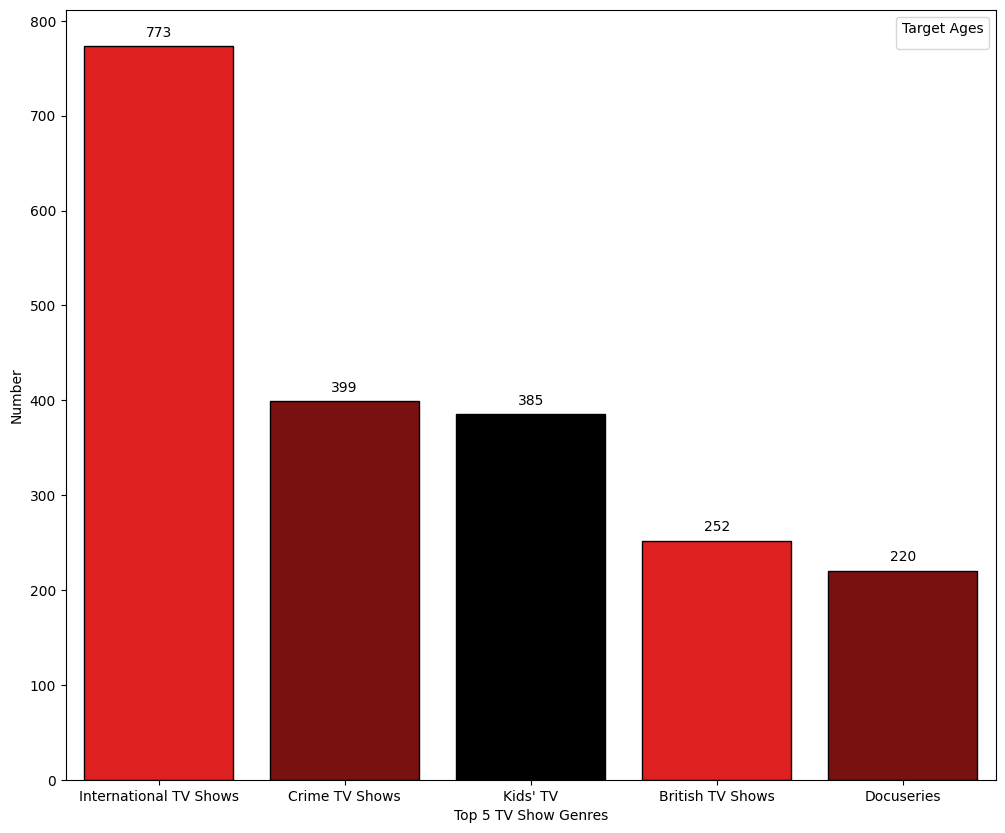

In [67]:
plt.figure(figsize=(12, 10))

# Create the count plot
ax = sns.countplot(x='genre', data=df_tv_shows, order=df_tv_shows["genre"].value_counts().index[0:5],
                   palette=['red', 'darkred', 'black'], edgecolor='black')

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(),ha='center')

# Add count numbers above the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Top 5 TV Show Genres')
plt.ylabel('Number')
#plt.title('Distribution of Top 5 TV Show Genres by Target Ages')
plt.legend(title='Target Ages')

plt.show()


# Cast and Director

In [89]:
# Replace the null values in director.
df['director']=df['director'].fillna('')

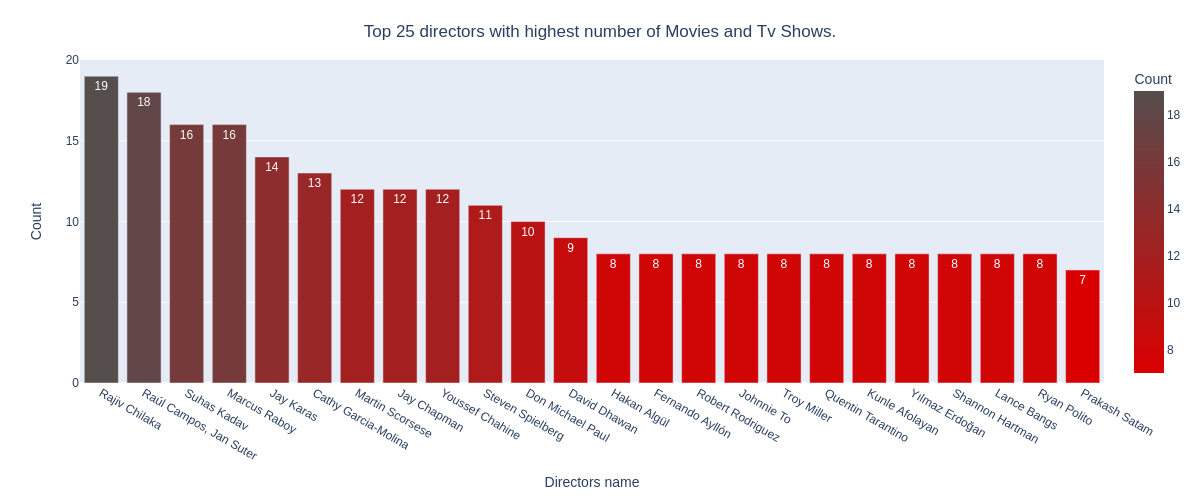

In [91]:
directors_list = df.director.value_counts().reset_index().head(25)[1:]  # We will not include the null values.
directors_list.rename(columns={'index':'Directors name', 'director':'Count'}, inplace=True)
fig = px.bar(directors_list, x='Directors name', y='Count', text_auto=True,
             color='Count', color_continuous_scale=['#db0000', '#564d4d'])

fig.update_traces(textangle=0, cliponaxis=False)
fig.update_layout(
    title={
        'text': 'Top 25 directors with highest number of Movies and Tv Shows.',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1200,
        height=500)
# fig.show()
fig.show('png')

In [92]:
# Create a list of all the actors in the data.
def data2list(data):
  actor_list = {}  # dict to store the count for each actor.
  temp_list = []   # list to store all the names.
  cast_list = list(data['cast'])  # define the data we intend to use.
  for i in range(len(cast_list)):
    temp_list.extend(str(cast_list[i]).split(','))
  for i in temp_list:
    if i not in actor_list:
      actor_list[i] = temp_list.count(i)
  return actor_list

In [93]:
# Create dataframe for list of actors.
actor_list = pd.DataFrame([data2list(df)]).T.reset_index()
actor_list = actor_list.sort_values(0, ascending=False).drop(106)  # dropped the nan values in the dataframe which was present at 106th index.

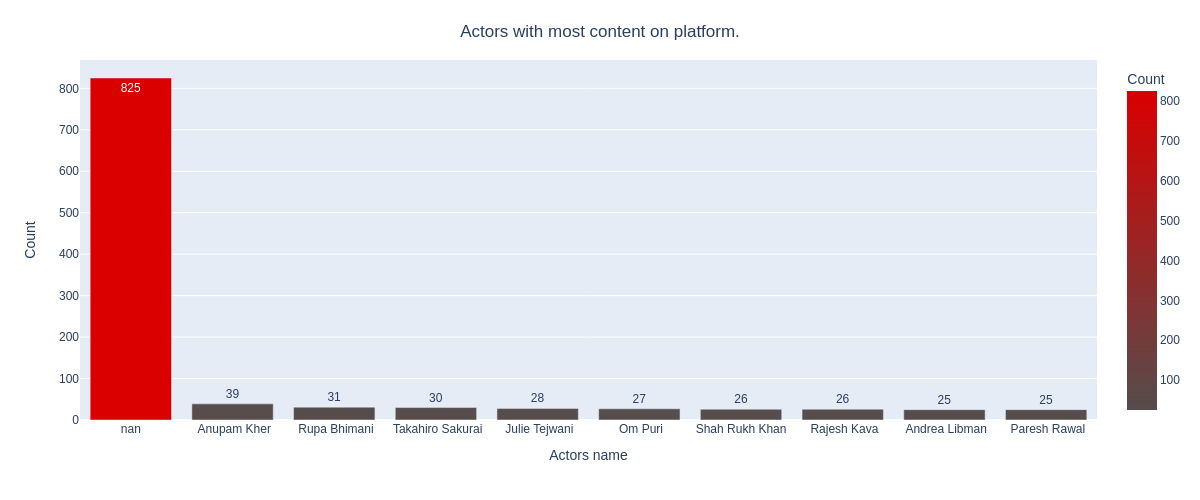

In [94]:
# Plot it.
top_10_actors = actor_list.head(10)
top_10_actors.rename(columns={'index':'Actors name', 0:'Count'}, inplace=True)

fig = px.bar(top_10_actors, x='Actors name', y='Count', text_auto=True,
             color='Count', color_continuous_scale=['#564d4d', '#db0000'])

fig.update_traces(textangle=0, cliponaxis=False)
fig.update_layout(
    title={
        'text': 'Actors with most content on platform.',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1200,
        height=500)
# fig.show()
fig.show('png')

# **Data Preprocessing**

### **We will be using text columns to create clusters for our data.**

In [95]:
cluster_df = df[['title']]
cluster_df['cluster_data'] = (df['description'] + ' ' + df['listed_in'] + ' ' + df['director'] + ' ' + df['cast'] + ' ' + df['country'] + ' ' + df['rating']).astype(str)
cluster_df.set_index('title', inplace = True)
cluster_df.head()
cluster_df.head()

,cluster_data
title,
Dick Johnson Is Dead,nan
Blood & Water,"After crossing paths at a party, a Cape Town t..."
Ganglands,To protect his family from a powerful drug lor...
Jailbirds New Orleans,nan
Kota Factory,In a city of coaching centers known to train I...


In [96]:
# Remove punctuation from the text.
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_punctuation)
cluster_df.head(2)

,cluster_data
title,
Dick Johnson Is Dead,nan
Blood & Water,After crossing paths at a party a Cape Town te...


In [97]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [71]:
stop_words = set(stopwords.words('english'))

In [98]:
# Remove the stopwords.
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)

cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stopwords)
cluster_df.cluster_data.head(2)

title
Dick Johnson Is Dead                                                  nan
Blood & Water           crossing paths party cape town teen sets prove...
Name: cluster_data, dtype: object

In [99]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [100]:
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stemming)
cluster_df.head(2)

,cluster_data
title,
Dick Johnson Is Dead,nan
Blood & Water,cross path parti cape town teen set prove whet...


In [75]:
bag_of_words = cluster_df.cluster_data

# **Create Clusters**

In [101]:
t_vectorizer = TfidfVectorizer(max_features=20000)
X= t_vectorizer.fit_transform(bag_of_words)

In [77]:
print(X.shape)

(8790, 20000)


In [78]:
t_vectorizer.get_feature_names_out()

array(['007', '10', '100', ..., 'şinasi', 'ştar', 'żulewska'],
      dtype=object)

### **Lets perform Dimensionality Reduction:**

In [79]:
pca = PCA()
pca.fit(X.toarray())

PCA()

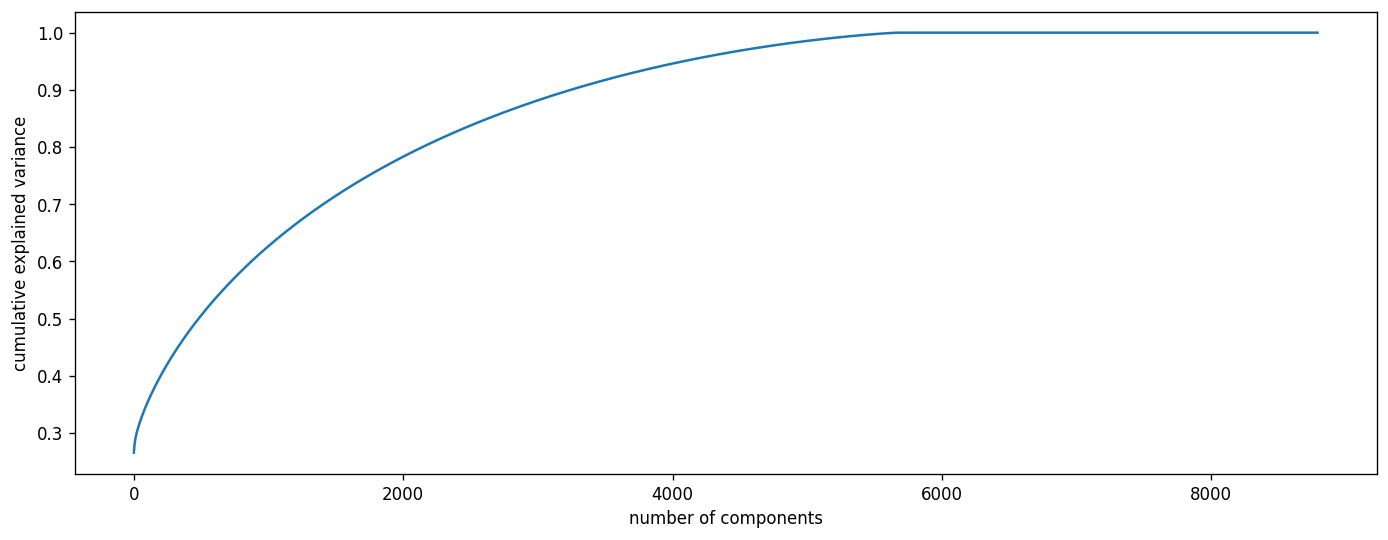

In [80]:
# Lets plot explained var v/s comp to check how many components to be considered.
plt.figure(figsize=(14,5), dpi=120)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

* ***We can see from the above plot almost 95% of the variance can be explained by 5000 components.***
* ***Since choosing 5000 could be tricky we will set the value to be 95% in sklearn.***

In [81]:
pca_tuned = PCA(n_components=0.95)
pca_tuned.fit(X.toarray())
X_transformed = pca_tuned.transform(X.toarray())
X_transformed.shape

(8790, 4081)

In [82]:
X_transformed

array([[ 6.52538701e-01,  9.95955670e-06,  4.89201977e-06, ...,
        -2.02260048e-07, -1.63327538e-07, -2.64763966e-07],
       [ 6.52538701e-01,  9.95955670e-06,  4.89201977e-06, ...,
        -2.02260048e-07, -1.63327538e-07, -2.64763966e-07],
       [-3.57231665e-01, -4.56031934e-02, -4.93264218e-02, ...,
         2.68350347e-03,  1.34287734e-02, -3.31619542e-03],
       ...,
       [-3.53610924e-01, -5.43696287e-02, -1.32637702e-02, ...,
        -7.16857498e-03, -6.29408791e-03,  2.90203726e-03],
       [-3.56869741e-01, -9.10140405e-02, -2.36326871e-02, ...,
         5.73844371e-03,  5.26455571e-03, -1.38421589e-02],
       [-3.57574015e-01,  1.21270767e-01,  2.43411749e-01, ...,
         2.72483354e-03,  5.43801210e-03,  1.11817277e-02]])

### **Get optimum K value using Metric:Shilhouette.**

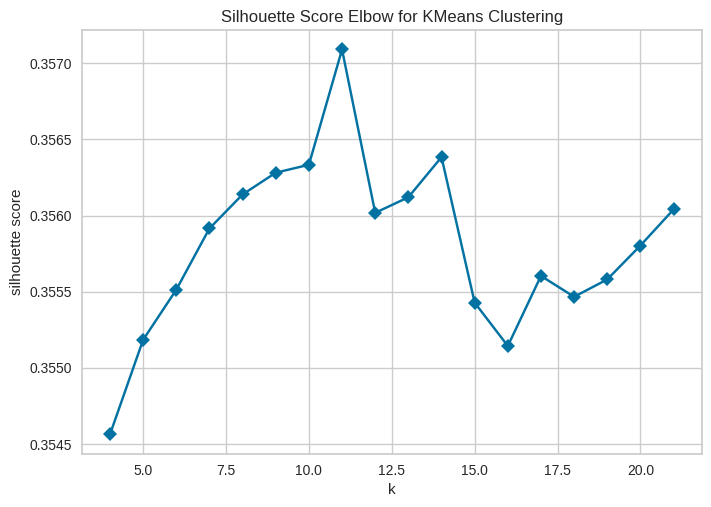

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [83]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=5)
visualizer = KElbowVisualizer(model, k=(4,22), metric='silhouette', timings=False, locate_elbow=False)

visualizer.fit(X_transformed)
visualizer.show()

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

### **Elbow method to find optimum k value:**

In [85]:
from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters, random_state=5)
      preds = km.fit_predict(X_transformed)
      centers = km.cluster_centers_

      score = silhouette_score(X_transformed, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X_transformed) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data

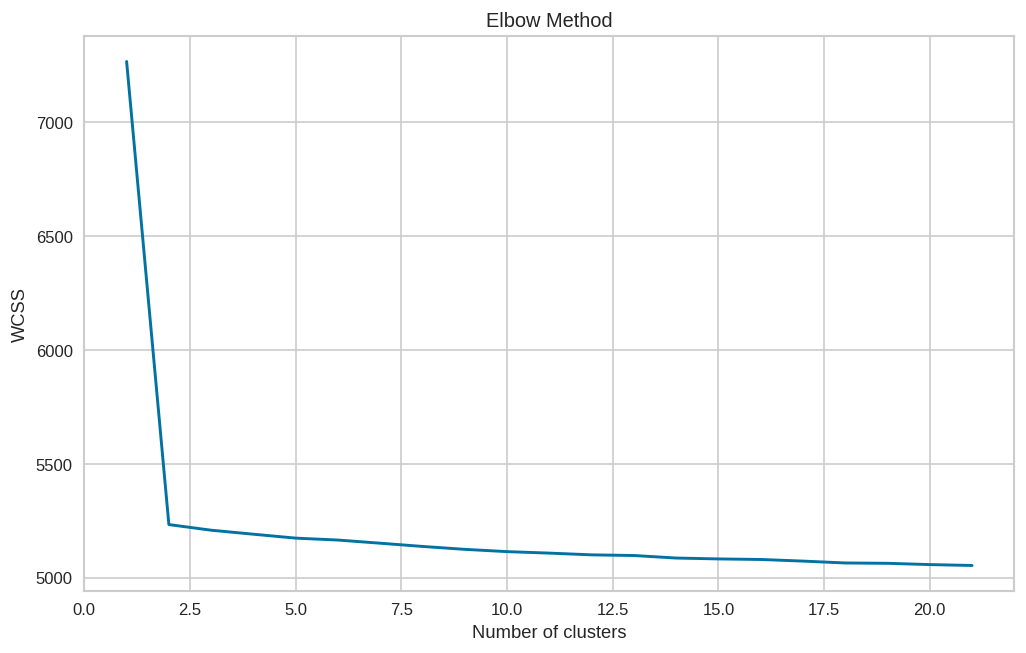

In [86]:
plt.figure(figsize=(10,6), dpi=120)
wcss = []
for i in range(1, 22):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## **Perform Clustering considering k=10.**

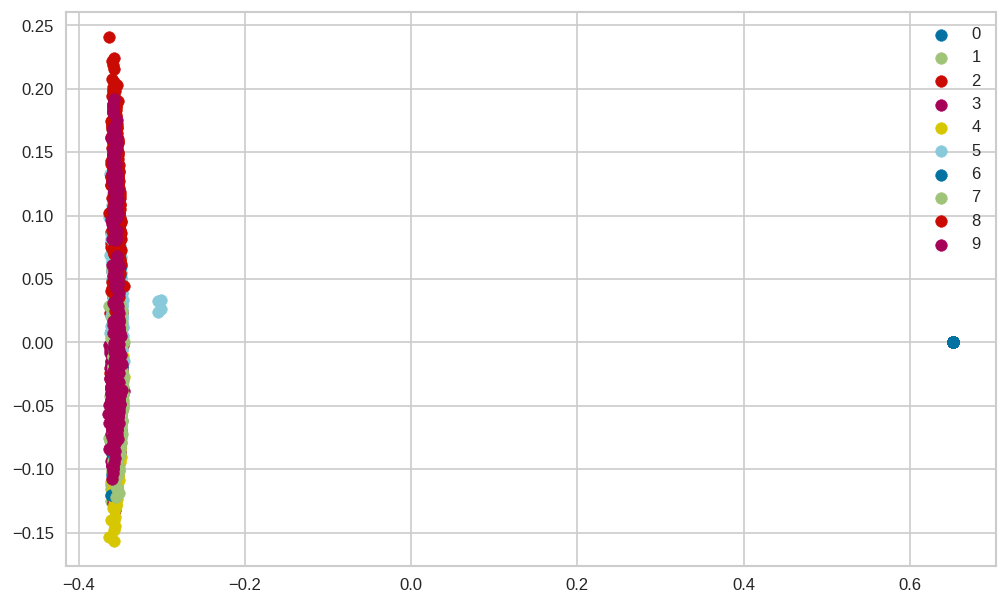

In [87]:
plt.figure(figsize=(10,6), dpi=120)

kmeans= KMeans(n_clusters=10, init= 'k-means++', random_state=9)
kmeans.fit(X_transformed)

#predict the labels of clusters.
label = kmeans.fit_predict(X_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(X_transformed[label == i , 0] , X_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

In [104]:
# Add cluster values to the dateframe.
df['cluster_number'] = kmeans.labels_

In [103]:
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [105]:
#word cloud for user rating review
def func_select_Category(category_name,column_of_choice):
  df_word_cloud = df[['cluster_number',column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud['cluster_number']==category_name]
  text = " ".join(word for word in df_word_cloud[column_of_choice])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Plot the wordclouds
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'Cluster: {i}')
  plt.axis("off")
  plt.show()

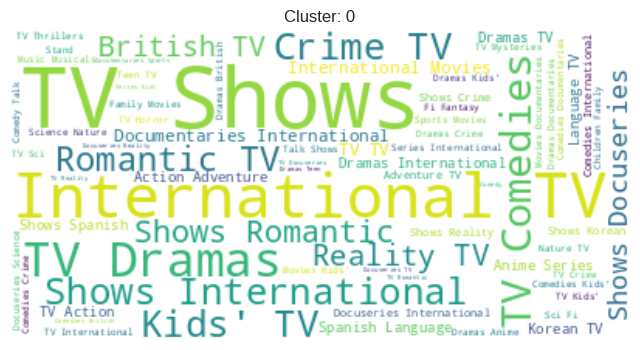

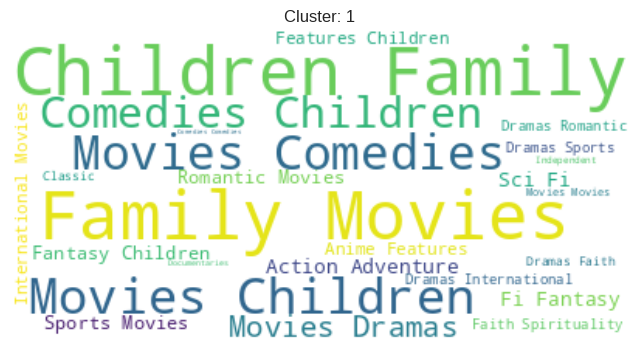

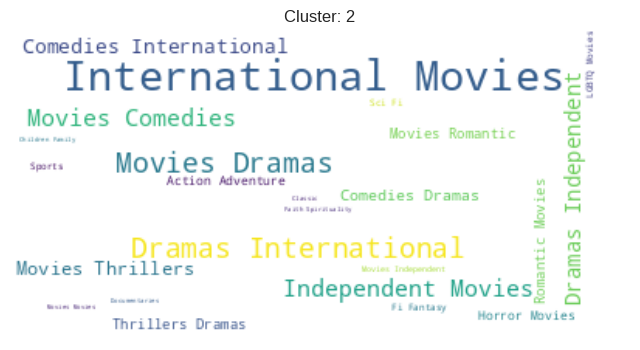

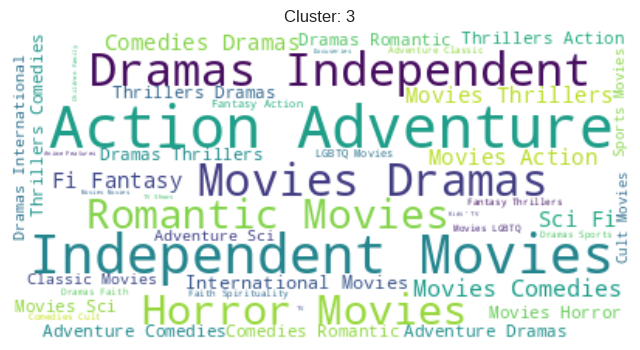

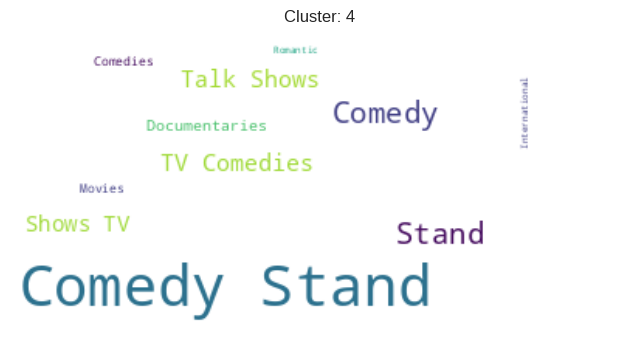

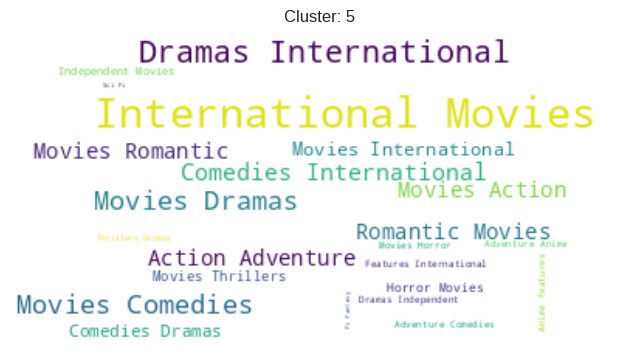

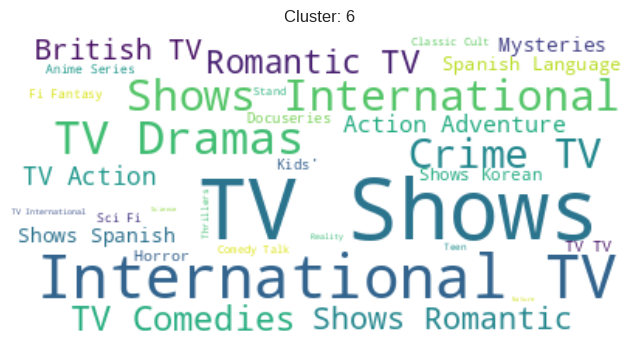

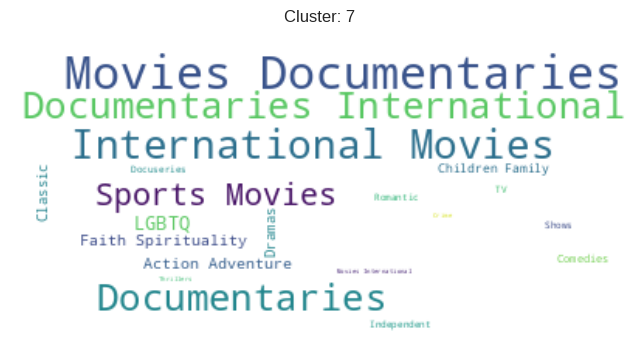

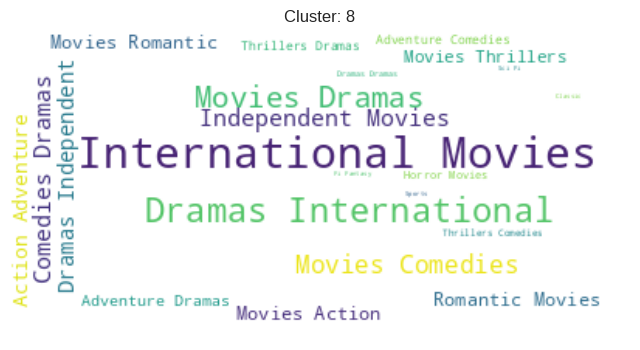

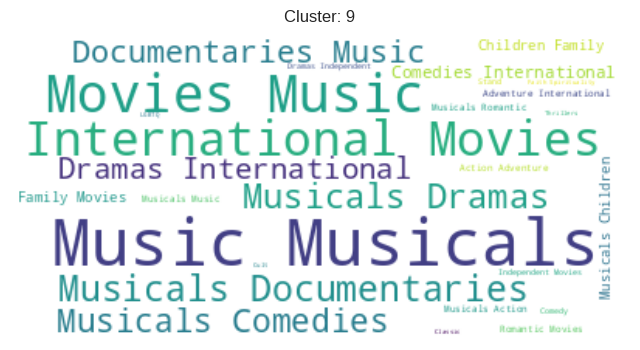

In [106]:
for i in range(10):
  func_select_Category(i,'listed_in')

# **Get Recommendations:**

## A recommender system is an application of machine learning that provides recommendations to users on what they might like based on their historical preferences.

## A content-based recommender learns a profile of the new user’s interests based on the features present, in objects the user has rated. It’s basically a keyword specific recommender system here keywords are used to describe the items. Thus, in a content-based recommender system the algorithms used are such that it recommends similar items that the user has liked in the past or is examining currently.

In [107]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [127]:
#new data
features=['genre','director','cast','description','title']
recommendation_df = df[features]

In [128]:
#filters
recommendation_df['director'] = recommendation_df['director'].fillna(recommendation_df['director'].mode()[0])
recommendation_df['cast'] = recommendation_df['cast'].fillna(recommendation_df['cast'].mode()[0])

recommendation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   genre        8790 non-null   object
 1   director     8790 non-null   object
 2   cast         8790 non-null   object
 3   description  8790 non-null   object
 4   title        8790 non-null   object
dtypes: object(5)
memory usage: 670.1+ KB


In [ ]:
#Cleaning the data by making all the words in lower case.
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [130]:
for feature in features:
    recommendation_df[feature] = recommendation_df[feature].apply(clean_data)

recommendation_df.sample(10)

,genre,director,cast,description,title
3248,children&familymovies,monikamitchell,"vanessahudgens,joshwhitehouse,emmanuellechriqu...",medievalmagicsendsa14th-centuryknighttomodern-...,theknightbeforechristmas
8637,dramas,jayroach,"bryancranston,dianelane,ellefanning,johngoodma...",whenheisblacklistedbyhollywoodforhisleftistpol...,trumbo
3731,dramas,chrisrobinson,"khalileverage,anthonyanderson,uzoaduba,emayatz...","onchicago'ssouthside,hip-hopprodigyaugustmonro...",beats
7008,children&familymovies,genndytartakovsky,"adamsandler,selenagomez,kevinjames,kathrynhahn...",it'sloveatfirstsightfordraculawhenhemeetserick...,hoteltransylvania3:summervacation
2909,movies,avgoustazourelidi,"debiderryberry,cassandramorris,sallisaffioti,l...",clawdeenwantstoturnanabandonedpowerstationinto...,monsterhigh:electrified
5892,dramas,"aaronhann,mariomiscione","juliebenz,mercymalick,carterjenkins,mollyjacks...",whenagroupofstrangersisseizedandawaitsexecutio...,circle
5291,documentaries,,davidattenborough,witnessesandpublicfiguresrespondtocontroversia...,"aliasjj,lacelebridaddelmal"
8327,dramas,davidbatty,"selvarasalingam,karimagouit,mouradzaoui,elmahm...",word-for-wordbibletextsoftheentirebookoflukear...,thegospelofluke
4524,cultmovies,"rustycundieff,darinscott","keithdavid,bryanbatt,alexandriadeberry,billmar...",buckleupforananthologyofsociallyconscioushorro...,talesfromthehood2
5987,horrormovies,victorzarcoff,"pjmccabe,briannemoncrief,sarahbaldwin,jimcummi...",youngparents-to-beclaireandryanmoveintoasuburb...,13cameras


In [131]:
def overall_info(x):
    return x['director'] + ' ' + x['cast'] + ' ' +x['genre']+' '+ x['description']

In [132]:
recommendation_df['overall_info'] = recommendation_df.apply(overall_info, axis=1)

In [133]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(recommendation_df['overall_info'])

In [134]:
# Compute the Cosine Similarity matrix based on the count_matrix
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [135]:
# Reset index of our main DataFrame and construct reverse mapping as before
recommendation_df=recommendation_df.reset_index()
indices = pd.Series(recommendation_df.index, index=recommendation_df['title'])

##  Defining the recommendation system

In [136]:
def get_recommendations_new(title, cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

## Getting recommendations

In [137]:
# Printing recomended movies
get_recommendations_new('Extraction', cosine_sim2)

7403                                            Marauders
6759                                           First Kill
8464                                           The Prince
8268                                     The Darkest Dawn
4170                                                Polar
6077                                            Abdo Mota
7290    LEGO Ninjago: Masters of Spinjitzu: Day of the...
354                                    The Last Boy Scout
2713                                          Sol Levante
6429                                      Casino Tycoon 2
Name: title, dtype: object

In [138]:
# Printing recomended movies
get_recommendations_new('Stranger Things', cosine_sim2)

5200                               Beyond Stranger Things
1195    Operation Varsity Blues: The College Admission...
1127                                     Prank Encounters
3624                                         No Good Nick
7061                                          In The Deep
1811                                        Yes, God, Yes
6917                                             Hannibal
125                                               Q-Force
1361                                       The Unsettling
2904                                        Miss Virginia
Name: title, dtype: object

# Sentiment analysis IMDb reviews

In [140]:
#merge data IMDb
imdb_movies = pd.read_csv('/content/drive/MyDrive/IMDb movies.csv', low_memory=False)
imdb_ratings = pd.read_csv('/content/drive/MyDrive/IMDb ratings.csv',low_memory=False)

In [141]:
#IMDB data after merge
imdb = pd.merge(imdb_movies,imdb_ratings, on='imdb_title_id')
imdb.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,12/26/1906,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,8/19/1911,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,Cleopatra,Cleopatra,1912,11/13/1912,"Drama, History",100,USA,English,Charles L. Gaskill,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,L'Inferno,L'Inferno,1911,3/6/1911,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [142]:
#
df_imdb = pd.DataFrame({'Title':imdb.title,
                    'Rating': imdb.mean_vote})

df_imdb.drop_duplicates(subset=['Title', 'Rating'], inplace=True)

print(df_imdb.shape)
df_imdb.head(5)

(85705, 2)


,Title,Rating
0,Miss Jerry,5.9
1,The Story of the Kelly Gang,6.3
2,Den sorte drøm,6.0
3,Cleopatra,5.3
4,L'Inferno,6.9


In [143]:
#join IMDb and Netflix dataset
Inner_join_data = df_imdb.merge(df,left_on='Title', right_on='title', how='inner')
Inner_join_data=Inner_join_data.sort_values(by='Rating', ascending=False)

print(Inner_join_data.shape)
Inner_join_data

(2942, 22)


,Title,Rating,show_id,type,title,director,cast,country,date_added,release_year,...,listed_in,description,day_added,year_added,month_added,date_of_week,target_ages,country_single,cluster_number,genre
1141,Game,9.5,s3137,Movie,Game,Abhinay Deo,"Abhishek Bachchan, Kangana Ranaut, Anupam Kher...",India,2019-12-15,2011,...,"International Movies, Thrillers",A tycoon accuses three strangers of killing hi...,15,2019,December,Sunday,Teens,India,8,International Movies
1095,Innocent,9.3,s4175,TV Show,Innocent,Seren Yüce,"Ali Atay, Haluk Bilginer, Nur Sürer, Okan Yala...",Turkey,2019-01-23,2017,...,"Crime TV Shows, International TV Shows, TV Dramas","In a peaceful, rustic town, a retired officer ...",23,2019,January,Wednesday,Adults,Turkey,6,Crime TV Shows
1305,Silencer,9.1,s8018,Movie,Silencer,Timothy Woodward Jr.,"Johnny Messner, Danny Trejo, Tito Ortiz, Chuck...",United States,2018-12-03,2018,...,"Action & Adventure, Independent Movies",When a drug lord kidnaps his girlfriend’s daug...,3,2018,December,Monday,Adults,United States,3,Action & Adventure
2319,Surga Yang Tak Dirindukan,9.1,s4161,Movie,Surga Yang Tak Dirindukan,Kuntz Agus,"Fedi Nuril, Laudya Cynthia Bella, Raline Shah,...",Indonesia,2019-01-28,2015,...,"Dramas, Faith & Spirituality, International Mo...",After saving an unwed expectant mother who's i...,28,2019,January,Monday,Teens,Indonesia,5,Dramas
2758,Merku Thodarchi Malai,9.0,s4222,Movie,Merku Thodarchi Malai,Lenin Bharathi,"Antony, Gayathri Krishna, Abu Valayamkulam, An...",India,2019-01-01,2018,...,"Dramas, Independent Movies, International Movies","In southern India, a laborer's dreams of ownin...",1,2019,January,Tuesday,Adults,India,8,Dramas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2510,Romina,2.3,s4776,Movie,Romina,Diego Cohen,"Francisca Lozano, Oliver Nava, Arantza Ruiz, C...",Mexico,2018-07-13,2018,...,"Horror Movies, Independent Movies, Internation...",A shocking assault inspires horrific violence ...,13,2018,July,Friday,Adults,Mexico,2,Horror Movies
2367,Kyaa Kool Hain Hum 3,2.2,s204,Movie,Kyaa Kool Hain Hum 3,Umesh Ghadge,"Tusshar Kapoor, Aftab Shivdasani, Krishna Abhi...",India,2021-08-27,2016,...,"Comedies, International Movies",When an unlikely porn actor falls for a woman ...,27,2021,August,Friday,Adults,India,8,Comedies
656,Himmatwala,2.2,s4443,Movie,Himmatwala,Sajid Khan,"Ajay Devgn, Tamannaah Bhatia, Paresh Rawal, Za...",India,2018-11-01,2013,...,"Action & Adventure, Comedies, International Mo...",A young man returns to his native village on a...,1,2018,November,Thursday,Teens,India,8,Action & Adventure
2372,Aerials,2.1,s2556,Movie,Aerials,S.A. Zaidi,"Saga Alyasery, Ana Druzhynina, Mansour Al Fele...",United Arab Emirates,2020-05-07,2016,...,"International Movies, Sci-Fi & Fantasy",Dubai residents struggle to figure out why a f...,7,2020,May,Thursday,Teens,United Arab Emirates,5,International Movies


In [144]:
#new IMDb dataset
New_Data = Inner_join_data[['Title', 'Rating', 'type']]

New_Data.drop_duplicates(subset=['Title','Rating', 'type'], inplace=True)
print(New_Data.shape)
New_Data.head(5)

(2940, 3)


,Title,Rating,type
1141,Game,9.5,Movie
1095,Innocent,9.3,TV Show
1305,Silencer,9.1,Movie
2319,Surga Yang Tak Dirindukan,9.1,Movie
2758,Merku Thodarchi Malai,9.0,Movie


In [145]:
#filter type movie and tv show
Movies_Data = New_Data[New_Data.type == 'Movie']
TV_Data = New_Data[New_Data.type == 'TV Show']
print(Movies_Data.shape)
print(TV_Data.shape)

(2579, 3)
(361, 3)


In [146]:
Movies_Data = Movies_Data.drop(['type'], axis=1)
Movies_Data

,Title,Rating
1141,Game,9.5
1305,Silencer,9.1
2319,Surga Yang Tak Dirindukan,9.1
2758,Merku Thodarchi Malai,9.0
1592,Waar,9.0
...,...,...
2510,Romina,2.3
2367,Kyaa Kool Hain Hum 3,2.2
656,Himmatwala,2.2
2372,Aerials,2.1


In [147]:
Movies_Data['Polarity_Rating'] = Movies_Data['Rating'].apply(lambda x: 'Positive' if x > 6 else 'Negative')
Movies_Data

,Title,Rating,Polarity_Rating
1141,Game,9.5,Positive
1305,Silencer,9.1,Positive
2319,Surga Yang Tak Dirindukan,9.1,Positive
2758,Merku Thodarchi Malai,9.0,Positive
1592,Waar,9.0,Positive
...,...,...,...
2510,Romina,2.3,Negative
2367,Kyaa Kool Hain Hum 3,2.2,Negative
656,Himmatwala,2.2,Negative
2372,Aerials,2.1,Negative


In [148]:
fig = px.pie(values=Movies_Data['Polarity_Rating'].value_counts(),
             names=Movies_Data['Polarity_Rating'].value_counts().index)
fig.show()

In [149]:
TV_Data = TV_Data.drop(['type'], axis=1)
TV_Data

,Title,Rating
1095,Innocent,9.3
1106,Breakout,8.8
467,Safe,8.3
200,Baby,8.3
830,Warrior,8.2
...,...,...
314,Scream,3.3
1187,Slasher,3.2
1783,House of Cards,3.0
833,Midnight Mass,2.8


In [150]:
TV_Data['Polarity_Rating'] = TV_Data['Rating'].apply(lambda x: 'Positive' if x > 6 else 'Negative')
TV_Data

,Title,Rating,Polarity_Rating
1095,Innocent,9.3,Positive
1106,Breakout,8.8,Positive
467,Safe,8.3,Positive
200,Baby,8.3,Positive
830,Warrior,8.2,Positive
...,...,...,...
314,Scream,3.3,Negative
1187,Slasher,3.2,Negative
1783,House of Cards,3.0,Negative
833,Midnight Mass,2.8,Negative


In [151]:
#pie chart of data type TV Show
fig = px.pie(values=TV_Data['Polarity_Rating'].value_counts(),
             names=TV_Data['Polarity_Rating'].value_counts().index)
fig.show()

## Conclusion
With the help of this article, we have been able to learn about-

1 Quantity: Our analysis revealed that Netflix had added more movies than TV shows, aligning with the expectation that movies dominate their content library.

2 Content Addition: July emerged as the month when Netflix adds the most content, closely followed by December, indicating a strategic approach to content release.

3 Genre Correlation: Strong positive associations were observed between various genres, such as TV dramas and international TV shows, romantic and international TV shows, and independent movies and dramas. These correlations provide insights into viewer preferences and content interconnections.

4 Movie Lengths: The analysis of movie durations indicated a peak around the 1960s, followed by a stabilization around 100 minutes, highlighting a trend in movie lengths over time.

5 TV Show Episodes: Most TV shows on Netflix have one season, suggesting a preference for shorter series among viewers.

6 Common Themes: Words like love, life, family, and adventure were frequently found in titles and descriptions, capturing recurring themes in Netflix content.

7 Rating Distribution: The distribution of ratings over the years offers insights into the evolving content landscape and audience reception.

8 Data-Driven Insights: Our data analysis journey showcased the power of data in unraveling the mysteries of Netflix’s content landscape, providing valuable insights for viewers and content creators.

9 Continued Relevance: As the streaming industry evolves, understanding these patterns and trends becomes increasingly essential for navigating the dynamic landscape of Netflix and its vast library.

10 Happy Streaming: We hope this blog has been an enlightening and entertaining journey into the world of Netflix, and we encourage you to explore the captivating stories within its ever-changing content offerings. Let the data guide your streaming adventures!

# **Future Scope:**

* ***Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.***
* ***More time could be given into building a better recommender system, which later can be deployed on web for usage.***
